In [13]:
import numpy as np
import matplotlib.pyplot as plt
import glob
#Importamos todos los modulos de scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.metrics import f1_score


Nuestro dataset se obtiene de https://www.kaggle.com/moltean/fruits  <br />
Por la rapidez del algoritmo solo se tomo del folder test, de una sola fruta, 8 frutas. <br />
Organizamos las frutas en un dataset en el que les cambiamos la dimensionalidad y le asignamos a cada una de las frutas un numero

In [14]:
folderset = [folder for folder in glob.glob("Test/" + "**/", recursive=True)]
data = []
Y = []
largo = len(folderset)
Id = np.identity(largo).tolist()
for i in range(largo):
    fruta = folderset[i]
    imagenes = glob.glob("{}/*.jpg".format(fruta))
    print('Una Fruta')
    for imagen in imagenes:
        aqui = plt.imread(imagen).flatten()
        data.append(np.array(aqui))
        Y.append(i)
        
data = np.array(data)
print(np.shape(data))
print(np.shape(Y))

Una Fruta
Una Fruta
Una Fruta
Una Fruta
Una Fruta
Una Fruta
Una Fruta
Una Fruta
Una Fruta
(1343, 30000)
(1343,)


In [15]:
x_train, x_test, y_train, y_test = train_test_split(data, Y, train_size=0.5)

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
train_samples = len(X_train)


Variemos el C para los diferentes tipos de regularizacion 

In [27]:
ces = np.logspace(-3,3, 50)
f1_l1  = []
f1_l2  = []
for i in range(len(ces)):
    clf1 = LogisticRegression(C=ces[i], penalty='l1', solver='saga', tol=0.1)
    clf1.fit(X_train, y_train)
    print('Uno')
    clf2 = LogisticRegression(C=ces[i], penalty='l2', solver='saga', tol=0.1)
    clf2.fit(X_train, y_train)
    print('Otro')
    f1_l1.append(f1_score(y_test, clf1.predict(X_test), average='macro'))
    f1_l2.append(f1_score(y_test, clf2.predict(X_test), average='macro'))

Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro
Uno
Otro


Para apreciar la diferencia de comportamiento se grafican en escala logaritmica.

[1.00000000e-03 1.32571137e-03 1.75751062e-03 2.32995181e-03
 3.08884360e-03 4.09491506e-03 5.42867544e-03 7.19685673e-03
 9.54095476e-03 1.26485522e-02 1.67683294e-02 2.22299648e-02
 2.94705170e-02 3.90693994e-02 5.17947468e-02 6.86648845e-02
 9.10298178e-02 1.20679264e-01 1.59985872e-01 2.12095089e-01
 2.81176870e-01 3.72759372e-01 4.94171336e-01 6.55128557e-01
 8.68511374e-01 1.15139540e+00 1.52641797e+00 2.02358965e+00
 2.68269580e+00 3.55648031e+00 4.71486636e+00 6.25055193e+00
 8.28642773e+00 1.09854114e+01 1.45634848e+01 1.93069773e+01
 2.55954792e+01 3.39322177e+01 4.49843267e+01 5.96362332e+01
 7.90604321e+01 1.04811313e+02 1.38949549e+02 1.84206997e+02
 2.44205309e+02 3.23745754e+02 4.29193426e+02 5.68986603e+02
 7.54312006e+02 1.00000000e+03]


Text(0.5, 1.0, 'Evolucion del F1 score con C para diferentes regularizaciones')

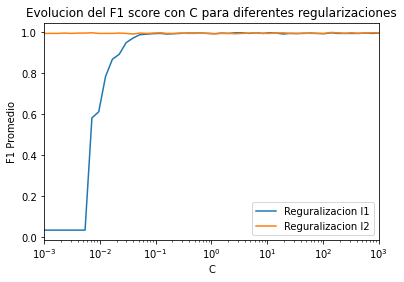

In [29]:
print(ces)
plt.plot(ces,f1_l1, label='Reguralizacion l1')
plt.plot(ces,f1_l2, label='Reguralizacion l2')
plt.legend()
plt.xlabel('C')
plt.ylabel('F1 Promedio')
plt.xscale("log")
plt.xlim([0.001,1000])
plt.title('Evolucion del F1 score con C para diferentes regularizaciones')

La regularizacion l2 no es igual de buena que la de l1 al enviar los coeficientes a 0. Busquemos hacia que valores empieza a disminuir el score de la regularizacion l2.

In [33]:
clf2 = LogisticRegression(C=0.00000001, penalty='l2', solver='saga', tol=0.1)
clf2.fit(X_train, y_train)
print(f1_score(y_test, clf2.predict(X_test), average='macro'))

0.7458571631549609


Para un valor de $C = 10^{-8}$ ya se nota una disminucion del score de l2. 